In [31]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [35]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [37]:
# Normalize the images to [0, 1] range
x_train/= 255
x_test /=255

In [39]:
# Expand dimensions to match the input shape required by Conv2D
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [41]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
# Train the model
history=model.fit(x_train, y_train, epochs=5, batch_size=2000, validation_split=0.2)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 606ms/step - accuracy: 0.5989 - loss: 1.6984 - val_accuracy: 0.8900 - val_loss: 0.3672
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 620ms/step - accuracy: 0.8905 - loss: 0.3612 - val_accuracy: 0.9340 - val_loss: 0.2228
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 752ms/step - accuracy: 0.9341 - loss: 0.2167 - val_accuracy: 0.9575 - val_loss: 0.1496
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 696ms/step - accuracy: 0.9578 - loss: 0.1457 - val_accuracy: 0.9678 - val_loss: 0.1130
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 707ms/step - accuracy: 0.9668 - loss: 0.1083 - val_accuracy: 0.9718 - val_loss: 0.0975


In [46]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.1027

Test accuracy: 0.97


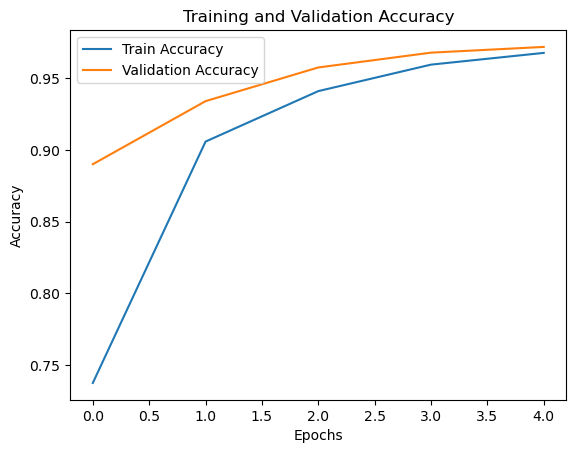

In [47]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


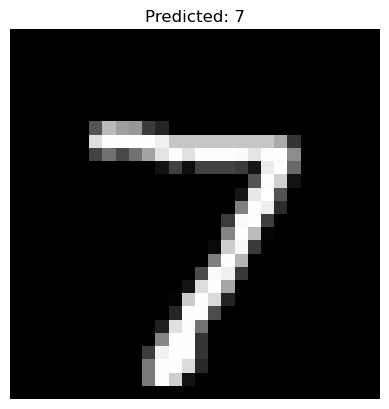

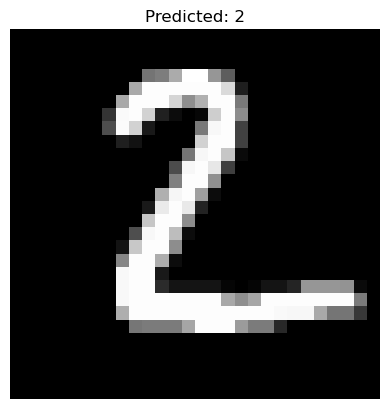

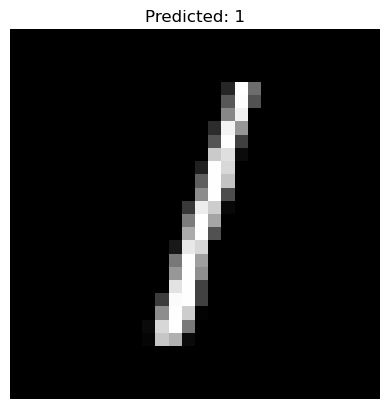

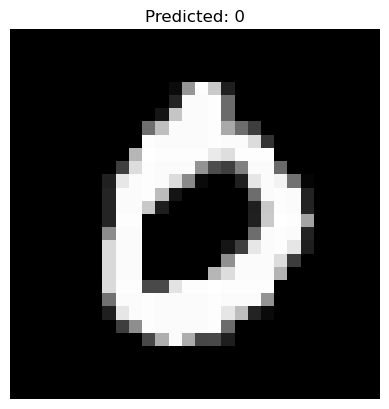

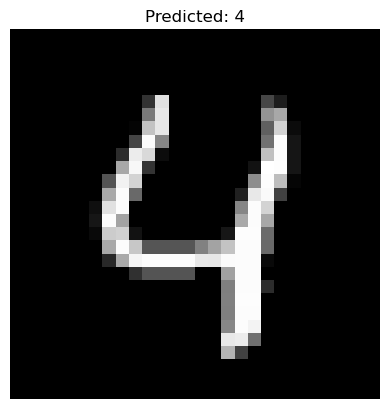

In [48]:
# Predict on a few test samples
history= model.predict(x_test[:5])

# Display images with predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(history[i])}")
    plt.axis('off')
    plt.show()
